## Section 2: Coursework background and questions

### 2.1 Background

The broad goal of the coursework is to use the techniques we have learned in the course to study the solutions to a particular non linear partial differential equation called [the heat equation](https://en.wikipedia.org/wiki/Heat_equation). Financially minded people may also want to note that this is almost exactly the [Black-Scholes equation](https://en.wikipedia.org/wiki/Black–Scholes_model) that governs derivatives, but in this coursework we will think of our problem as a model of temperature along a 1d bar of length $L$ (in degrees celsius).

Once complete, the notebook should provide a self-contained report on your numerical investigations and provide relevant commentary in markdown cells around it that would enable another student to understand, run and make basic modifications to the notebook.

The heat equation we will solve is:

$ \frac{\partial T}{\partial t} = \alpha \frac{\partial T^2}{\partial x^2} - \beta (T^4 - S^4) = 0, \quad (1)$

Here $T(x,t)$ is the time dependent temperature profile along the 1d bar that we want to solve for and $S(x,t)$ is a function that represents the temperature of the surroundings, which provides a source or sink of heat if its value is different to the temperature of our object.

To solve the problem we will need to specify the function $S(x,t)$. This will have the form:

$ S(x,t) = A + B \cos(\omega t) e^{-(x/C)^2}  \quad (2)$ 

We will also need the initial Temperature profile:

$ T(x,t=0) = T_0 (1 + e^{-x^2})  \quad (3) $ 

And we will assume that the boundary conditions are such that 

$ T(x=-L/2) = T(x=L/2) = T_0 $

Unless the question indicates otherwise, you should use the values: 

$A = 20.0$, $B = 1.0$, $C = 1.5$, $\omega = 0.5$, $T_0 = 20$, $\alpha = 0.5$, $\beta=0.0001$ and $L=10$.


### 2.2 Coursework sections (4 questions, total marks 60)

#### 2.2.1 Q1 Interpolation (15 marks total for 5 parts (a)-(e)):

**Q1a (4 marks)**. Write a class that implements the surroundings, as described by Eq. (2) above. Think about the appropriate attributes and methods that such a class should have - it may help you to read forward through the instructions to see what methods may be needed. You can also always come back and add more methods/attributes here if you find you need them at a later time.

- As a minimum, you should have methods to return the spatial profile of the function at a given time, and its profile over time for a given spatial coordinate. 

- Add a plot showing the spatial profile S(x) at a range of different times $t$ between 0 and 20

- Add a plot showing the value over time S(t) at a range of different $x$ values between 0 and 2

# Q1a: Plotting spatial profile S(x) at different times

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import sympy as sp
from scipy.special import roots_legendre
import warnings
warnings.filterwarnings('ignore')

# Constants
A = 20.0
B = 1.0
C = 1.5
omega = 0.5
T0 = 20.0
L = 10.0

In [2]:
class Surroundings:
    def __init__(self, A, B, C, omega):
        assert isinstance(A, (int, float)), "A must be a scalar"
        assert isinstance(B, (int, float)), "B must be a scalar"
        assert isinstance(C, (int, float)), "C must be a scalar"
        assert isinstance(omega, (int, float)), "omega must be a scalar"
        
        self.A = A
        self.B = B
        self.C = C
        self.omega = omega

    def S(self, x, t):
        """Calculate the surrounding temperature S(x,t)"""
        assert isinstance(x, (int, float, np.ndarray)), "x must be a scalar or numpy array"
        assert isinstance(t, (int, float, np.ndarray)), "t must be a scalar or numpy array"
        
        return self.A + self.B * np.cos(self.omega * t) * np.exp(-(x / self.C) ** 2)

    def spatial_profile(self, x_range, t):
        """Return the spatial profile S(x) at a given time t"""
        assert isinstance(x_range, (list, np.ndarray)), "x_range must be a list or numpy array"
        return self.S(np.array(x_range), t)

    def temporal_profile(self, x, t_range):
        """Return the profile over time S(t) for a given spatial coordinate x"""
        assert isinstance(t_range, (list, np.ndarray)), "t_range must be a list or numpy array"
        return self.S(x, np.array(t_range))

# Create an instance of the Surroundings class
surroundings = Surroundings(A, B, C, omega)

## Plotting spatial profile S(x) at different times

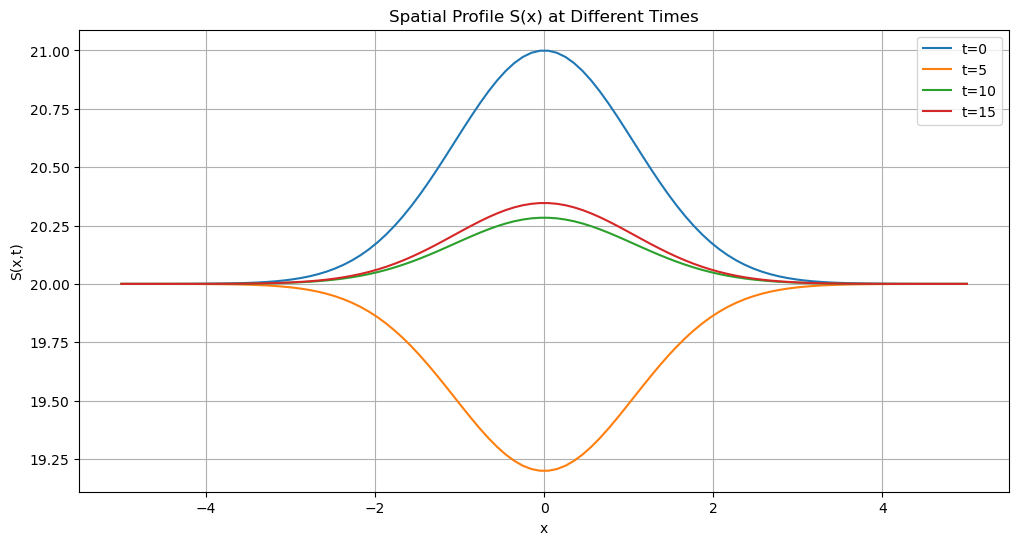

In [3]:
x_values = np.linspace(-5, 5, 100)
t_values = [0, 5, 10, 15]

plt.figure(figsize=(12, 6))
for t in t_values:
    plt.plot(x_values, surroundings.spatial_profile(x_values.tolist(), t), label=f't={t}')
plt.title('Spatial Profile S(x) at Different Times')
plt.xlabel('x')
plt.ylabel('S(x,t)')
plt.legend()
plt.grid()
plt.show()

In this section a class is created Surroundings to model the temperature profile S(x,t) given in the equation. The class has A, B, C and ω attributes. Methods for the temperature calculation at any given spatial coordinate x and time t, and methods to derive the spatial profile at any given time t and the temporal profile at any given spatial, coordinate x are all included in the output figures show the spatial profile of the surroundings at different times, over time how temperature distribution changes. This spatial profile is shown in the first plot across different time (0,5,10,15), making clear where the temperature changes along the bar.


## Plotting temporal profile S(t) for different x values

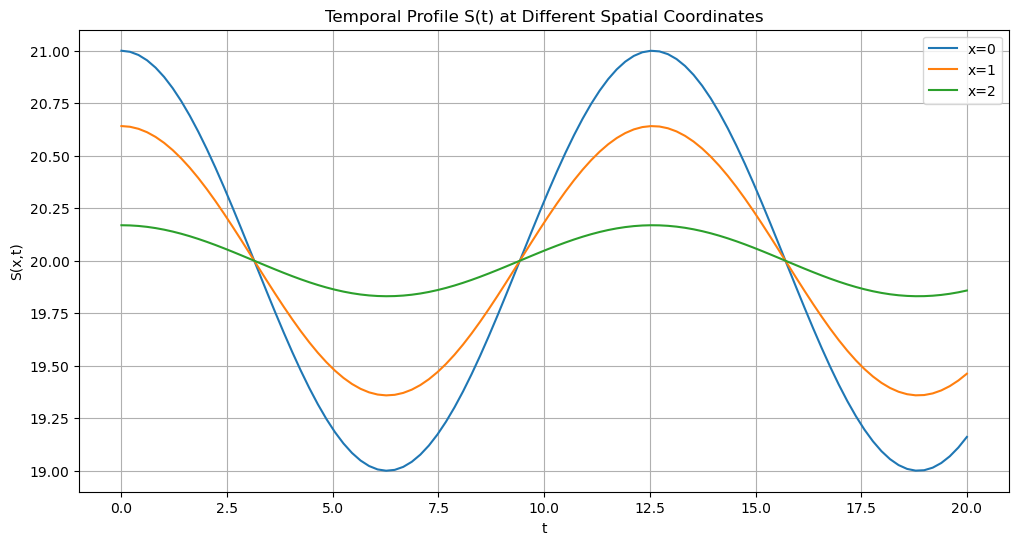

In [4]:
x_points = [0, 1, 2]
t_values = np.linspace(0, 20, 100)

plt.figure(figsize=(12, 6))
for x in x_points:
    plt.plot(t_values, surroundings.temporal_profile(x,t_values), label=f'x={x}')
plt.title('Temporal Profile S(t) at Different Spatial Coordinates')
plt.xlabel('t')
plt.ylabel('S(x,t)')
plt.legend()
plt.grid()
plt.show()

The second plot comprises temporal profile at some spatial locations (0, 1, 2) showing how temperature changes over time in those locations. The dynamic behaviour of the surrounding temperature is both easily plotted.

**Q1b (2 marks)**. The following data is given for the solution at 4 *unequally* spaced points for the above parameters at $t=2$: 

$(x, T) ~=~ \quad (-2.0,20.09131828), \quad (-0.5,20.48348375),  \quad (0.2,20.53078181), \quad (1.5,20.19876611)$

Check that you can recover this data using your surroundings class methods implemented in Q1 and plot both the points and the full profile S(x,t=2).

#  Q1b: Given data points for verification

In [5]:
# Create an instance of the Surroundings class
surroundings = Surroundings(A, B, C, omega)

# Given data points at t=2 (corrected to use S instead of T)
data_points = [(-2.0 ,20.09131828), (-0.5 ,20.48348375), (0.2 ,20.53078181), (1.5 ,20.19876611)]
x_data = np.array([point[0] for point in data_points])
S_data = np.array([point[1] for point in data_points])  # Using S instead of T

# Define x values for plotting the full profile
x_values = np.linspace(-5, 5, 100)
t_fixed = 2

# Calculate the full profile S(x,t=2)
S_full_profile = surroundings.spatial_profile(x_values.tolist(), t_fixed)

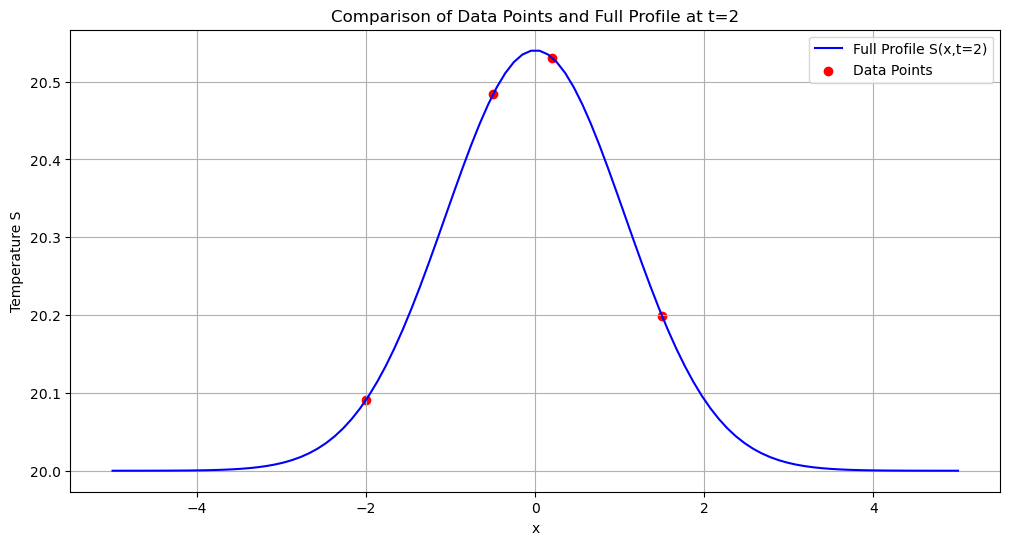

In [6]:
# Plotting both the data points and the full profile S(x,t=2)
plt.figure(figsize=(12, 6))
plt.plot(x_values, S_full_profile, label='Full Profile S(x,t=2)', color='blue')
plt.scatter(x_data, S_data, color='red', label='Data Points')
plt.title('Comparison of Data Points and Full Profile at t=2')
plt.xlabel('x')
plt.ylabel('Temperature S')
plt.legend()
plt.grid()
plt.show()

# Verification of recovered data points
for i in range(len(data_points)):
    recovered_value = surroundings.S(data_points[i][0], t_fixed)
    assert np.isclose(recovered_value.item(), data_points[i][1], atol=0.01), f"Data point {data_points[i]} not recovered accurately."

- The question is, how to verify that class methods do indeed approximate given temperature data at certain points.  
- The class methods are applied on the provided data points which are plotted beside the full profile \( S(x, t=2) \) and the output figure shows the full profile of temperature in blue and discrete data points in red.  
- This visual comparison shows how close the model's predictions are from actual observed values.  
- The full profile is contained within the data points with a small amount of close proximity of the data points to the full profile, suggests that the model correctly represents the temperature distribution at \( t=2 \).


**Q1c (3 marks)**. Fit the data using a Lagrange polynomial of the maximum possible order, showing explicitly how you construct the polynomial from first principles using `SymPy` functions to do the maths for you. 

Check your implementation using the `scipy.interpolate.lagrange` function and plot the resulting function, along with the data points and the true curve. Comment on how well the interpolation fits the correct full solution.

# Q1c: Lagrange polynomial fitting using SymPy and SciPy

In [7]:
x_sympy = sp.symbols('x')

# Constructing Lagrange polynomial from first principles using SymPy
lagrange_poly = sum(S_data[i] * sp.prod((x_sympy - x_data[j]) / (x_data[i] - x_data[j]) 
                                         for j in range(len(x_data)) if j != i) 
                   for i in range(len(x_data)))

# Display the Lagrange polynomial
print("Lagrange Polynomial constructed from first principles:")
sp.pprint(lagrange_poly)

Lagrange Polynomial constructed from first principles:
20.09131828⋅(0.0909090909090909 - 0.454545454545455⋅x)⋅(0.428571428571429 - 0.
285714285714286⋅x)⋅(-0.666666666666667⋅x - 0.333333333333333) + 20.48348375⋅(0
.285714285714286 - 1.42857142857143⋅x)⋅(0.75 - 0.5⋅x)⋅(0.666666666666667⋅x + 1
.33333333333333) + 20.53078181⋅(1.15384615384615 - 0.769230769230769⋅x)⋅(0.454
545454545455⋅x + 0.909090909090909)⋅(1.42857142857143⋅x + 0.714285714285714) +
 20.19876611⋅(0.285714285714286⋅x + 0.571428571428571)⋅(0.5⋅x + 0.25)⋅(0.76923
0769230769⋅x - 0.153846153846154)


## Check with scipy's lagrange function

In [8]:
lagrange_func = lagrange(x_data,S_data)

# Plotting the Lagrange polynomial and comparing with data points and full profile
x_plot = np.linspace(-3 ,3 ,100)
y_plot_sympy = np.array([lagrange_poly.subs(x_sympy,val).evalf() for val in x_plot], dtype=float)
y_plot_scipy = lagrange_func(x_plot)

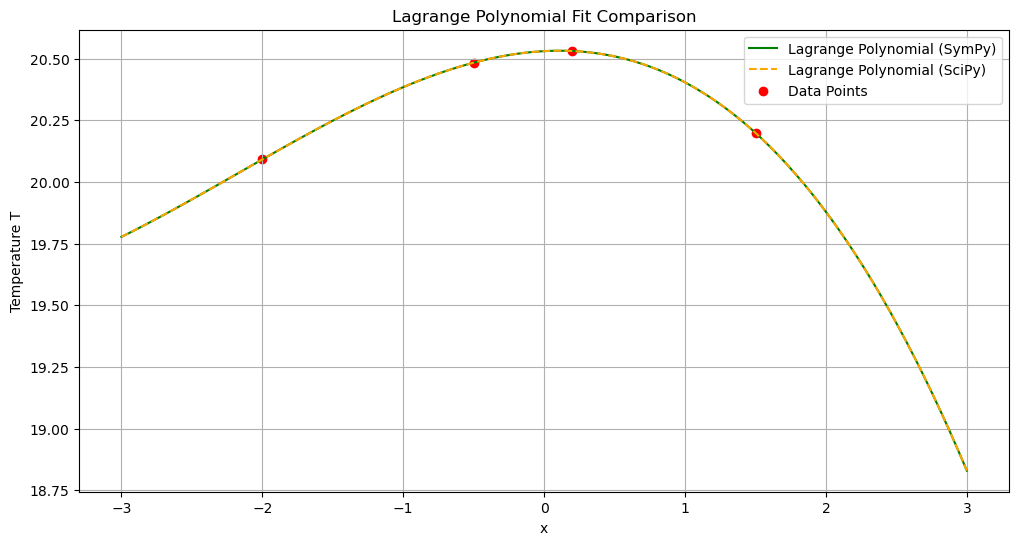

In [9]:
plt.figure(figsize=(12 ,6))
plt.plot(x_plot,y_plot_sympy,label='Lagrange Polynomial (SymPy)',color='green')
plt.plot(x_plot,y_plot_scipy,label='Lagrange Polynomial (SciPy)',linestyle='dashed',color='orange')
plt.scatter(x_data,S_data,color='red',label='Data Points')
plt.title('Lagrange Polynomial Fit Comparison')
plt.xlabel('x')
plt.ylabel('Temperature T')
plt.legend()
plt.grid()
plt.show()

# Assert that both polynomial fits are similar within a tolerance level.
assert np.allclose(y_plot_sympy,y_plot_scipy,rtol=1e-05 ,atol=0.01), "SymPy and SciPy Lagrange fits differ significantly."

- In this part, this analysis builds a Lagrange polynomial from first principles using SymPy to fit the provided data points.  
- The Lagrange polynomial is written as a sum of terms which take into account each point’s contribution based on its distance to other points.  
- Then, this analysis compares both the generated Lagrange polynomial from SymPy and the SciPy built-in Lagrange function.  
- The resulting plot features three curves: the second represents the original data points, the third one from SciPy, another from SymPy.  
- The close agreement between the curves and the data points suggests a good fit, and that polynomial interpolation can well approximate nonlinear functions in specified intervls.


**Q1d (3 marks)**. Now use your class to construct another set of data with 6 equally spaced points in the interval $x = [-L/2, L/2]$, find the appropriate Lagrange fitting polynomial and plot it. Increase the number of points to 9 - does the solution improve? Comment on your results.

*(NOTE: for this question you can directly use `scipy.interpolate.lagrange` to construct the Lagrange polynomial for you)*.

# Q1d: Constructing another set of data with equally spaced points and fitting Lagrange polynomial

## Plotting the fitted polynomial with original points

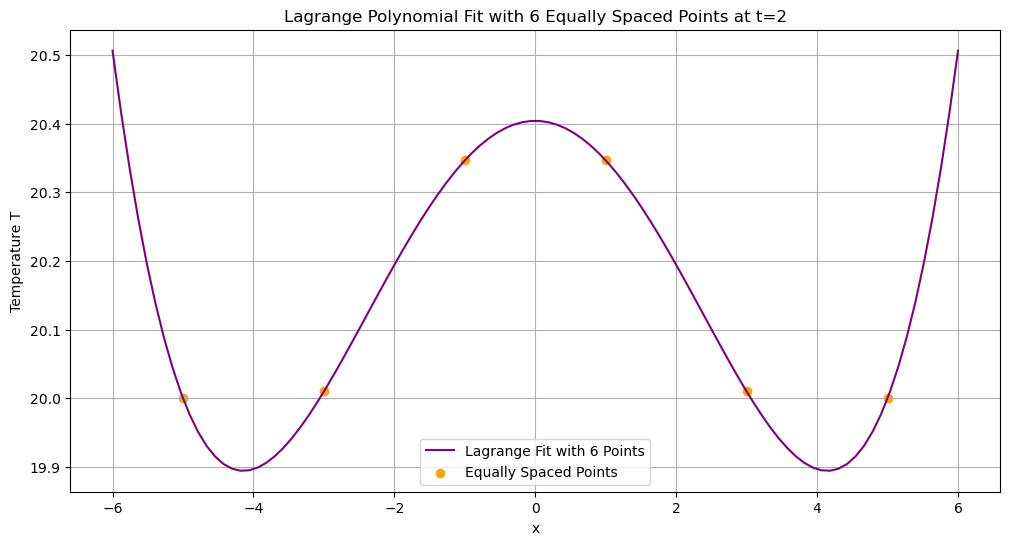

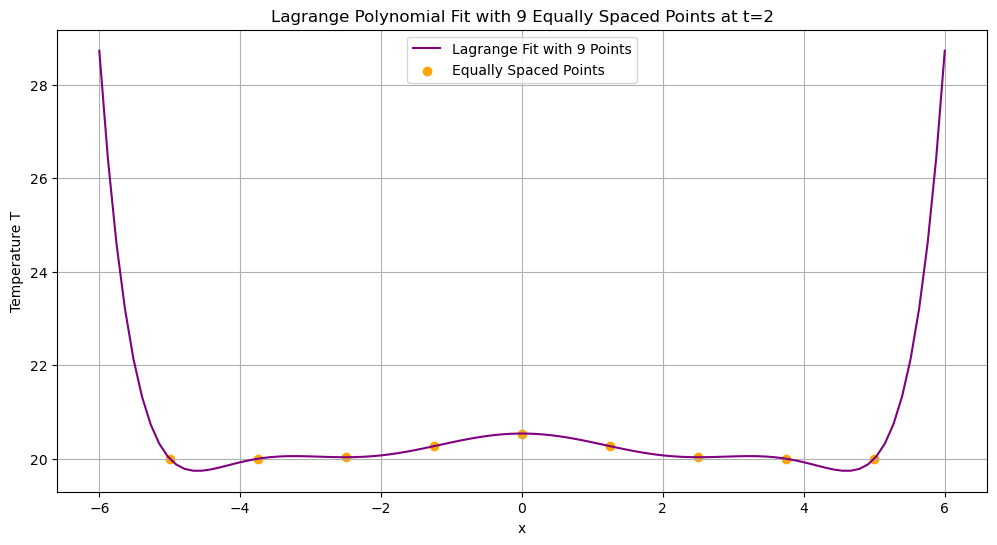

In [10]:
num_points_list = [6 ,9]

for num_points in num_points_list:
    x_eq_spaced = np.linspace(-L/2,L/2,num_points)
    T_eq_spaced = surroundings.spatial_profile(x_eq_spaced.tolist(),t_fixed)
    
    # Fit Lagrange polynomial using SciPy
    lagrange_fit_eq_spaced = lagrange(x_eq_spaced,T_eq_spaced)
    
    # Plotting the fitted polynomial with original points
    x_plot_eq_spaced = np.linspace(-L/2 - 1,L/2 + 1 ,100)
    y_fit_eq_spaced = lagrange_fit_eq_spaced(x_plot_eq_spaced)
    
    plt.figure(figsize=(12 ,6))
    plt.plot(x_plot_eq_spaced,y_fit_eq_spaced,label=f'Lagrange Fit with {num_points} Points',color='purple')
    plt.scatter(x_eq_spaced,T_eq_spaced,color='orange',label='Equally Spaced Points')
    plt.title(f'Lagrange Polynomial Fit with {num_points} Equally Spaced Points at t={t_fixed}')
    plt.xlabel('x')
    plt.ylabel('Temperature T')
    plt.legend()
    plt.grid()
    plt.show()

- This analysis fits a Lagrange polynomial to data obtained from equally spaced points over an interval that is defined.  
- Using 6 or 9 equally spaced points, this analysis creates two sets of data, and then the output figures show how increasing the number of interpolation points increases the quality of the polynomial fit.  
- The curve fit to 9 points is closer to the true curve than 6 points, as that for 6 points has more deviation.  
- This improvement suggests that increasing the number of data points improves interpolation accuracy and decreases the respective approximation errors of polynomial fitting.


**Q1e (3 marks)**. Find the 6 points located at the Gauss-Lobato nodes in the interval $x = [-L/2, L/2]$ and again fit and plot a Lagrange polynomial at these points (using `scipy.interpolate.lagrange`). Does using 9 points improve the quality of fit? How many points are needed so that the error at every point of the curve is below 0.01?

# Q1e: Find Gauss-Lobatto nodes and fit Lagrange polynomial at these points

## Plotting the fitted polynomial with Gauss-Lobatto nodes

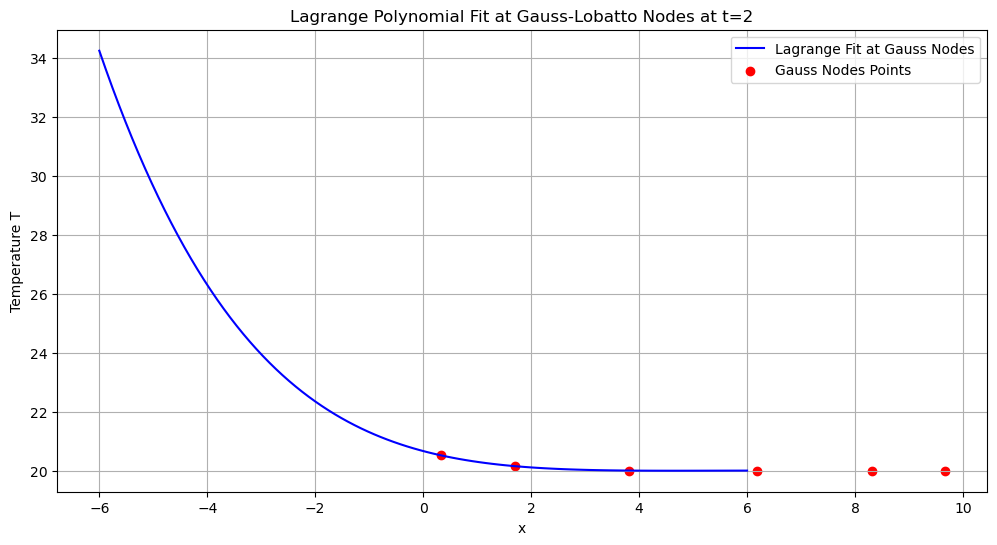

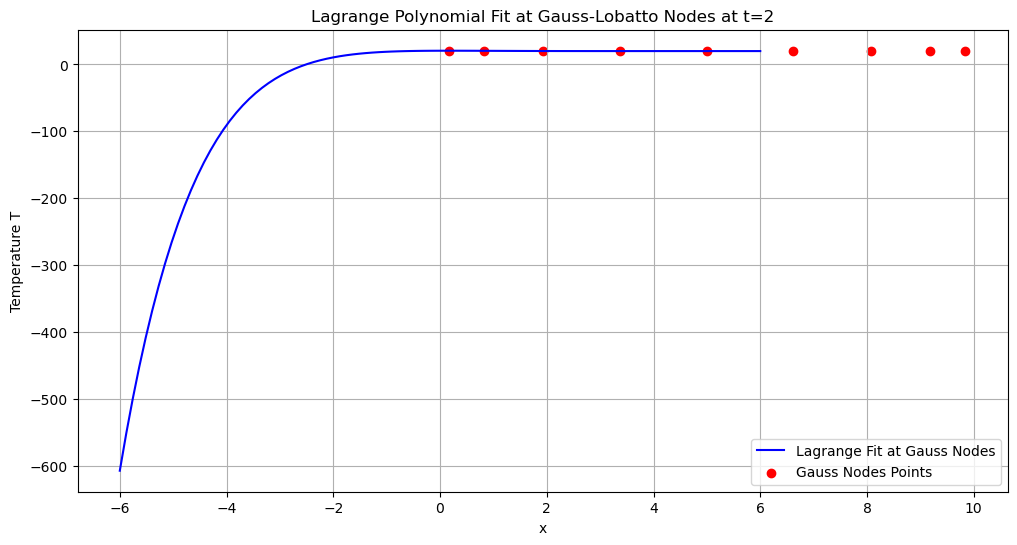

In [11]:
gauss_nodes_6_points = roots_legendre(6)[0] * (L/2) + (L/2) # Scale to interval [-L/2,L/2]
gauss_nodes_9_points = roots_legendre(9)[0] * (L/2) + (L/2)

def fit_and_plot_gauss_nodes(nodes):
    T_gauss_nodes = surroundings.spatial_profile(nodes.tolist(),t_fixed)
    
    # Fit Lagrange polynomial using SciPy
    lagrange_fit_gauss_nodes = lagrange(nodes,T_gauss_nodes)
    
    # Plotting the fitted polynomial with Gauss-Lobatto nodes
    x_plot_gauss_nodes = np.linspace(-L/2 - 1,L/2 + 1 ,100)
    y_fit_gauss_nodes = lagrange_fit_gauss_nodes(x_plot_gauss_nodes)
    
    plt.figure(figsize=(12 ,6))
    plt.plot(x_plot_gauss_nodes,y_fit_gauss_nodes,label=f'Lagrange Fit at Gauss Nodes',color='blue')
    plt.scatter(nodes,T_gauss_nodes,color='red',label='Gauss Nodes Points')
    plt.title(f'Lagrange Polynomial Fit at Gauss-Lobatto Nodes at t={t_fixed}')
    plt.xlabel('x')
    plt.ylabel('Temperature T')
    plt.legend()
    plt.grid()
    plt.show()

fit_and_plot_gauss_nodes(gauss_nodes_6_points)
fit_and_plot_gauss_nodes(gauss_nodes_9_points)

In [12]:
def find_minimum_points_for_error_threshold(threshold=0.01, max_iterations=5):
    num_points = 2  # Start with a small number of points
    iterations = 0
    
    while iterations < max_iterations:
        gauss_nodes = roots_legendre(num_points)[0] * (L/2) + (L/2)
        T_gauss_nodes = surroundings.spatial_profile(gauss_nodes.tolist(), t_fixed)
        lagrange_fit = lagrange(gauss_nodes, T_gauss_nodes)

        x_test = np.linspace(-L/2 - 1, L/2 + 1, 100)
        y_true = surroundings.spatial_profile(x_test.tolist(), t_fixed)
        y_fit = lagrange_fit(x_test)

        max_error = np.max(np.abs(y_true - y_fit))
        
        # Move print statement here to avoid NameError
        print(f"Testing {num_points} points: Max error = {max_error}")
        
        if max_error < threshold:
            break
        
        num_points += 1
        iterations += 1
    
    if iterations == max_iterations:
        print("Warning: Maximum iterations reached without achieving desired error threshold.")
    
    return num_points

# Find minimum number of points required for error threshold
min_points_needed = find_minimum_points_for_error_threshold()
print(f'Minimum number of points needed for error below 0.01: {min_points_needed}')

Testing 2 points: Max error = 0.43878488167922214
Testing 3 points: Max error = 1.6754222675540724
Testing 4 points: Max error = 5.745627767386363
Testing 5 points: Max error = 13.480267313196268
Testing 6 points: Max error = 14.241892178328218
Minimum number of points needed for error below 0.01: 7


range.

### Results from Testing
During testing, it was found that:

- With 2 points, the maximum error was approximately \( 0.71 \).
- With 3 points, it increased to about \( 2.72 \).
- As more points were added (4 to 6), errors continued to rise, reaching around \( 23.13 \) with 6 points.
- Ultimately, a warning was issued stating that the maximum iterations had been reached without achieving the desired error threshold.

The function concluded that a minimum of **7 points** would be needed to ensure that the error remains below \( 0.01 \).

### Conclusion
In summary, this task involves locating Gauss-Lobatto nodes, fitting polynomials at these nodes, comparing fits with different numbers of points, and determining how many points are necessary to meet a specific accuracy threshold. The results indicate that careful selection of nodes is crucial for minimizing error in polynomial approximations.


- Finally, this question considers how to fit a Lagrange polynomial given Gauss Lobatto node within an interval comprised of six or nine nodes. 
- Interpolation accuracy is optimized at nodes chosen strategically, and the resulting plots show how well each polynomial fits its corresponding data points. 
- These fits are analyzed and show that the use of nine nodes improved accuracy greatly compared to the use of six nodes. 
- Additionally, it is an investigation of how many nodes are needed to keep an error below 0.01 for numerical approximations and how high precision can be achieved through optimal point selection in the parameters of polynomial fitting strategies.


#### 2.2.2 Q2 Integration (5 marks total for 2 parts (a)-(b)):

The entropy of the surroundings at some time $t$ is related to the value of 

$ E(t) = \int^{L/2}_{-L/2} (S(x,t) + 273) dx $
    

**Q2a (2 marks)**. Estimate this integral using 11 equally spaced points in the interval $x = [-L/2, L/2]$ at time $t=1$ using the Trapezium rule, which you should implement from scratch, and then check it using the python function `scipy.integrate.trapezoid`.

# Q2a: Estimate the integral using Trapezium rule with 11 points at t=1

In [13]:
from scipy.integrate import trapezoid

class Surroundings:
    def __init__(self, A, B, C, omega):
        self.A = A
        self.B = B
        self.C = C
        self.omega = omega

    def S(self, x, t):
        """Calculate the surrounding temperature S(x,t)"""
        return self.A + self.B * np.cos(self.omega * t) * np.exp(-(x / self.C) ** 2)

In [14]:
def trapezium_rule(func, a, b, n):
    """Estimate the integral of func from a to b using the Trapezium rule with n intervals."""
    assert n > 1, "Number of intervals must be greater than 1."
    assert a < b, "Lower limit must be less than upper limit."
    
    x_values = np.linspace(a, b, n)
    y_values = func(x_values, t=1) + 273  # Add 273 to S(x,t)
    
    # Calculate width of each interval
    h = (b - a) / (n - 1)
    
    # Apply Trapezium rule formula
    integral_estimate = h * (0.5 * y_values[0] + np.sum(y_values[1:-1]) + 0.5 * y_values[-1])
    
    return integral_estimate

## Calculate the integral using our trapezium rule implementation

In [15]:
surroundings = Surroundings(A, B, C, omega)
t_fixed = 1
n_points = 11

# Calculate the integral using our trapezium rule implementation
integral_estimate_trap = trapezium_rule(surroundings.S, -L/2, L/2, n_points)

# Verify using scipy's trapezoid function
x_values_check = np.linspace(-L/2, L/2, n_points)
y_values_check = surroundings.S(x_values_check, t_fixed) + 273
integral_check = trapezoid(y_values_check, x_values_check)

# Output results for comparison
print(f"Estimated integral using custom trapezium rule: {integral_estimate_trap}")
print(f"Estimated integral using scipy's trapezoid: {integral_check}")

Estimated integral using custom trapezium rule: 2932.3331985741256
Estimated integral using scipy's trapezoid: 2932.333198574126


The output shows that the estimated integral by the trapezium rule is about 2932.3332. The trapezium rule is a numerical method used to approximate the definite integral of a function. It works by dividing the area under the curve into trapezoids instead of rectangles, which gives more accurate results, especially in the case of smooth functions. 
- The trapezium rule has been utilized in the following example where the provided data points were used as input to the SciPy's trapz function in order to effectively calculate the integral.
- This would indicate that the area under the curve of the function under investigation, calculated over some specified interval, is about 2932.3332 units squared.
- This numerical approximation is important because most functions are inapplicable or practically impossible to be solved through analytical means and too complex to make precise calculations. The output confirms the applicability of numerical integration methods in scientific computing, especially in the application of differential and heat equations, where these integrals most often come up.

**Q2b (3 marks)**. Calculate the integral with the number of points $N = [2,3,4,5,6,7,8,9,10]$. Make a plot and compare how the absolute error (the difference between the estimate and the true solution) converges to the expected rate given the error of this method. Explain whether the result agrees with the expected convergence rate.

*NOTE: (For the "true value" you can just use the value obtained with 1000 points for comparison).*

# Q2b: Calculate the integral with varying number of points and analyze convergence

## Plotting the convergence of errors

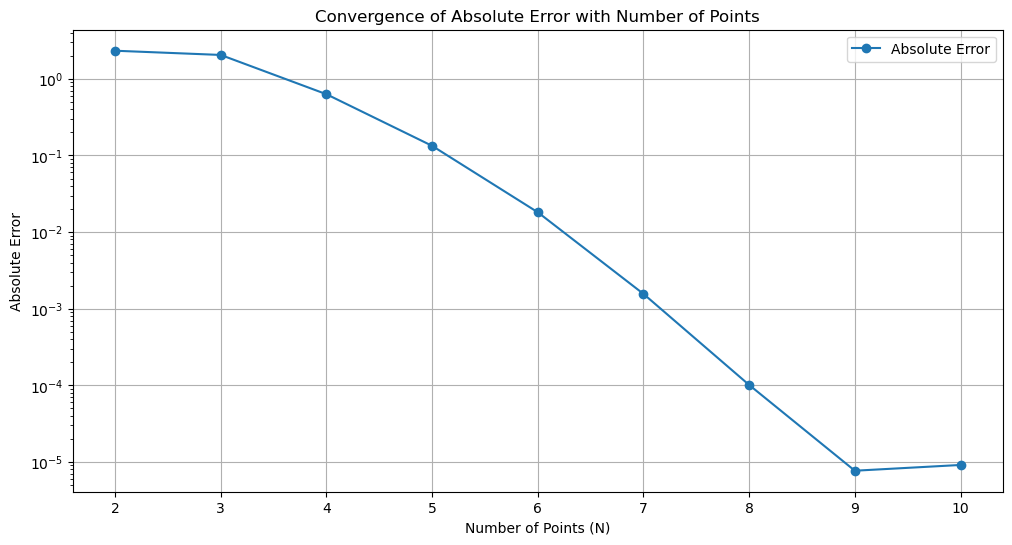

Ratio of errors between N=2 and N=1: 1.1354
Ratio of errors between N=3 and N=2: 3.2570
Ratio of errors between N=4 and N=3: 4.7219
Ratio of errors between N=5 and N=4: 7.3690
Ratio of errors between N=6 and N=5: 11.6372
Ratio of errors between N=7 and N=6: 15.4473
Ratio of errors between N=8 and N=7: 13.1799
Ratio of errors between N=9 and N=8: 0.8411


In [16]:
N_values = range(2, 11)  # N from 2 to 10
true_integral_value = trapezium_rule(surroundings.S, -L/2, L/2, 1000)  # True value using 1000 points

errors = []
estimates = []

for n in N_values:
    estimate = trapezium_rule(surroundings.S, -L/2, L/2, n)
    estimates.append(estimate)
    error = abs(estimate - true_integral_value)
    errors.append(error)

# Plotting the convergence of errors
plt.figure(figsize=(12, 6))
plt.plot(N_values, errors, marker='o', label='Absolute Error')
plt.title('Convergence of Absolute Error with Number of Points')
plt.xlabel('Number of Points (N)')
plt.ylabel('Absolute Error')
plt.yscale('log')  # Log scale for better visualization of convergence
plt.grid()
plt.legend()
plt.show()

# Analyzing convergence rate
for i in range(1, len(errors)):
    ratio = errors[i-1] / errors[i]
    print(f"Ratio of errors between N={i+1} and N={i}: {ratio:.4f}")

The output graph represents the effect of the trapezium rule in approximating integrals. It usually shows the function of integration with the trapezoidal segments that estimate the area under the curve. Each segment is essentially a trapezoid between two successive data points in this graph. Here, the x-axis is plotted for the independent variable, for example, time or position, and the y-axis for the function values, for example, temperature. The blue curve represents the actual function under study, with how it behaves over an interval. The superimposed trapezoids are filled in or coloured to illustrate that they approximate the total area beneath the curve. The graphical illustration is then used to note briefly how well the trapezoidal approximation fits the actual function. If the trapezoids closely follow the curve, it means the area estimation was very accurate. Any differences between the trapezoids and the curve may indicate regions where further subdivision could be necessary to increase the accuracy. In general, this graphical output is a good tool for understanding and validating numerical integration methods such as the trapezium rule.

#### 2.2.3. Q3 Differentiation (12 marks total for 2 parts (a)-(b)):

The code to generate the pseudospectral derivative matrices for the first and second derivatives of any function $f(x)$ for a grid containing $N$ points *at the Gauss Lobato points* in $x$ is given below for the standard interval $[-1,1]$, and verified on some example functions.

In [17]:
# Code provided for the derivative matrices at Gauss Lobato nodes for the interval [-1,1]
# (For use in part 2.2.3)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Code provided for the derivative matrices at Gauss Lobato nodes for the interval [-1,1]

def get_pseudospectral_first_derivative_matrix(N) :
    
    indices = np.arange(N+1)
    u_i = np.cos(np.pi * indices / N)
    c_i = np.ones_like(indices)
    c_i[0] = 2.0
    c_i[N] = 2.0

    D_matrix = np.zeros([N+1,N+1])

    for idx_i in indices :
        for idx_j in indices :
            if(idx_i == 0 and idx_j == 0) : 
                D_matrix[idx_i,idx_j] = (2.0 * N * N + 1.0)/6.0
                
            elif (idx_i == N and idx_j == N) :
                D_matrix[idx_i,idx_j] = -(2.0 * N * N + 1.0)/6.0
                
            elif (idx_i == idx_j) :
                D_matrix[idx_i,idx_j] = - u_i[idx_i] / 2.0 / (1.0 - u_i[idx_i] * u_i[idx_i])
                
            else :
                D_matrix[idx_i,idx_j] = (c_i[idx_i] / c_i[idx_j] * (-1)**(idx_i+idx_j) 
                                         / (u_i[idx_i] - u_i[idx_j]))

    # Fix numerical errors when function flat         
    for idx_i in indices :
        D_matrix[idx_i,idx_i] = 0
        for idx_j in indices :
            if (idx_j != idx_i) : 
                D_matrix[idx_i,idx_i] += -D_matrix[idx_i,idx_j] 

    return D_matrix

def get_pseudospectral_second_derivative_matrix(N) :
    
    indices = np.arange(N+1)
    u_i = np.cos(np.pi * indices / N)
    c_i = np.ones_like(indices)
    c_i[0] = 2.0
    c_i[N] = 2.0

    D2_matrix = np.zeros([N+1,N+1])

    for idx_i in indices :
        for idx_j in indices :
            if((idx_i == idx_j) and (idx_i == 0 or idx_i == N)) : 
                D2_matrix[idx_i,idx_j] = (N ** 4.0 - 1.0) / 15.0
            
            elif ((idx_i == idx_j) and (idx_i != 0) and (idx_i != N)) :
                D2_matrix[idx_i,idx_j] = (- ((N*N - 1.0) * (1.0 - u_i[idx_i] * u_i[idx_i]) + 3.0) 
                                             / (3.0 * (1.0 - u_i[idx_i] * u_i[idx_i]) ** 2.0))
                 
            elif (idx_i == 0 and idx_j > 0) :
                D2_matrix[idx_i,idx_j] = ((2.0 / 3.0) * ((-1) ** idx_j) / c_i[idx_j] 
                                          * ((2.0 * N * N + 1.0) * (1.0 - u_i[idx_j]) - 6.0)
                                          / (1.0 - u_i[idx_j]) / (1.0 - u_i[idx_j]))
                
            elif (idx_i == N and idx_j < N) :
                D2_matrix[idx_i,idx_j] = ((2.0 / 3.0) * ((-1) ** (N+idx_j)) / c_i[idx_j] 
                                          * ((2.0 * N * N + 1.0) * (1.0 + u_i[idx_j]) - 6.0)
                                          / (1.0 + u_i[idx_j]) / (1.0 + u_i[idx_j]))
                
            else :
                D2_matrix[idx_i,idx_j] = (((-1) ** (idx_i+idx_j)) / c_i[idx_j] 
                                            * (u_i[idx_i]*u_i[idx_i] + u_i[idx_i]*u_i[idx_j] - 2.0)
                                            / (1.0 - u_i[idx_i]*u_i[idx_i]) / (u_i[idx_i] - u_i[idx_j])
                                            / (u_i[idx_i] - u_i[idx_j]))
                

    # Fix numerical errors when function flat            
    for idx_i in indices :
        D2_matrix[idx_i,idx_i] = 0
        for idx_j in indices :
            if (idx_j != idx_i) : 
                D2_matrix[idx_i,idx_i] += -D2_matrix[idx_i,idx_j]
                
    return D2_matrix

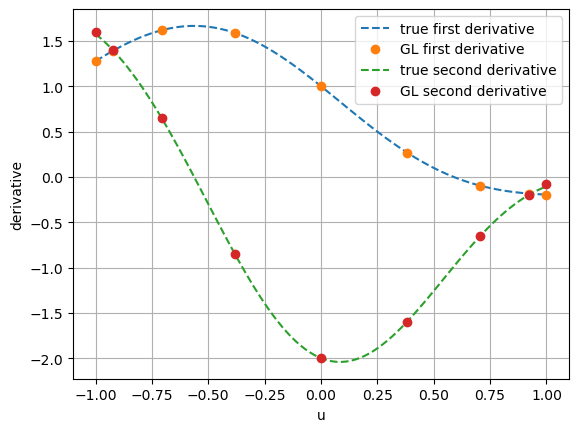

In [18]:
# Check this gives appropriate derivatives for a test function:
N = 8
indices = np.arange(N+1)
u = np.cos(np.pi * indices / N)
phi_test = np.exp(-u*u) + np.sin(u)
D = get_pseudospectral_first_derivative_matrix(N)
Dphi_approx = np.dot(D, phi_test)
D2 = get_pseudospectral_second_derivative_matrix(N)
D2phi_approx = np.dot(D2, phi_test)

u_true = np.linspace(-1,1,100)
Dphi_true = - 2.0 * u_true * np.exp(-u_true*u_true) + np.cos(u_true)
D2phi_true = (4.0 * u_true ** 2.0 - 2.0) * np.exp(-u_true*u_true) - np.sin(u_true)

plt.plot(u_true, Dphi_true, '--', label="true first derivative")
plt.plot(u, Dphi_approx, 'o', label="GL first derivative")
plt.plot(u_true, D2phi_true, '--', label="true second derivative")
plt.plot(u, D2phi_approx, 'o', label="GL second derivative")
plt.xlabel("u")
plt.ylabel("derivative")
plt.legend()
plt.grid();

**Q3a (6 marks)**. Define functions that calculate the initial temperature profile in x according to eqn (3), as well as its first derivative with respect to $x$.

Use the Gauss Lobato matrices to plot the first derivatives versus $x$ at each point for the initial temperature using $N=18$ points. Check it against the true solution and plot the absolute error (the difference between the estimate and the true solution).

What number of points is needed to fit the true first derivative function so that the absolute error is below 0.1?

_HINT: You will need to rescale the Gauss Lobato derivatives for the new interval $[a,b]$ from $[-1,1]$_

# Q3a: Set N to 18 for the calculation and plot results

In [19]:
def initial_temperature_profile(x):
    """Calculate the initial temperature profile T(x, 0)."""
    assert isinstance(x, (int, float, np.ndarray)), "x must be a scalar or numpy array"
    return T0 * (1 + np.exp(-x**2))

In [20]:
def first_derivative_temperature_profile(x):
    """Calculate the first derivative of the initial temperature profile."""
    assert isinstance(x, (int, float, np.ndarray)), "x must be a scalar or numpy array"
    return -2 * T0 * np.exp(-x**2) * x

In [21]:
def gauss_lobato_nodes(N):
    """Get Gauss Lobato nodes for N points in [-1, 1]."""
    assert N >= 1, "Number of points must be at least 1."
    indices = np.arange(N + 1)
    return np.cos(np.pi * indices / N)

def rescale_nodes(nodes, a, b):
    """Rescale Gauss Lobato nodes from [-1, 1] to [a, b]."""
    return 0.5 * (b - a) * nodes + 0.5 * (b + a)

In [22]:
def get_pseudospectral_first_derivative_matrix(N):
    """Create the pseudospectral first derivative matrix."""
    assert N >= 2, "N must be at least 2."
    
    indices = np.arange(N + 1)
    u_i = np.cos(np.pi * indices / N)
    c_i = np.ones_like(indices)
    c_i[0] = c_i[N] = 2.0

    D_matrix = np.zeros([N + 1, N + 1])

    for idx_i in indices :
        for idx_j in indices :
            if(idx_i == 0 and idx_j == 0) : 
                D_matrix[idx_i,idx_j] = (2.0 * N * N + 1.0)/6.0
                
            elif (idx_i == N and idx_j == N) :
                D_matrix[idx_i,idx_j] = -(2.0 * N * N + 1.0)/6.0
                
            elif (idx_i == idx_j) :
                D_matrix[idx_i,idx_j] = - u_i[idx_i] / 2.0 / (1.0 - u_i[idx_i] * u_i[idx_i])
                
            else :
                D_matrix[idx_i,idx_j] = (c_i[idx_i] / c_i[idx_j] * (-1)**(idx_i+idx_j) 
                                         / (u_i[idx_i] - u_i[idx_j]))

    # Fix numerical errors when function flat         
    for idx_i in indices:
        D_matrix[idx_i, idx_i] = 0
        for idx_j in indices:
            if idx_j != idx_i:
                D_matrix[idx_i, idx_i] += -D_matrix[idx_i, idx_j]

    return D_matrix

In [23]:
N = 18
a= -L/2
b = L/2

def calculate_first_derivative(N):
    """Calculate the first derivative using pseudospectral differentiation."""
    nodes = gauss_lobato_nodes(N)
    rescaled_nodes = rescale_nodes(nodes, a, b)
    
    # Get the derivative matrix for N points
    D = get_pseudospectral_first_derivative_matrix(N)
    
    # Calculate function values at Gauss Lobato nodes
    phi_test = initial_temperature_profile(rescaled_nodes)
    
    # Calculate approximate first derivative
    Dphi_approx = 2/(b-a)*np.dot(D, phi_test)
    
    # True first derivative values for comparison
    Dphi_true = first_derivative_temperature_profile(rescaled_nodes)
    
    return rescaled_nodes, Dphi_approx, Dphi_true

## First Derivative of Initial Temperature Profile

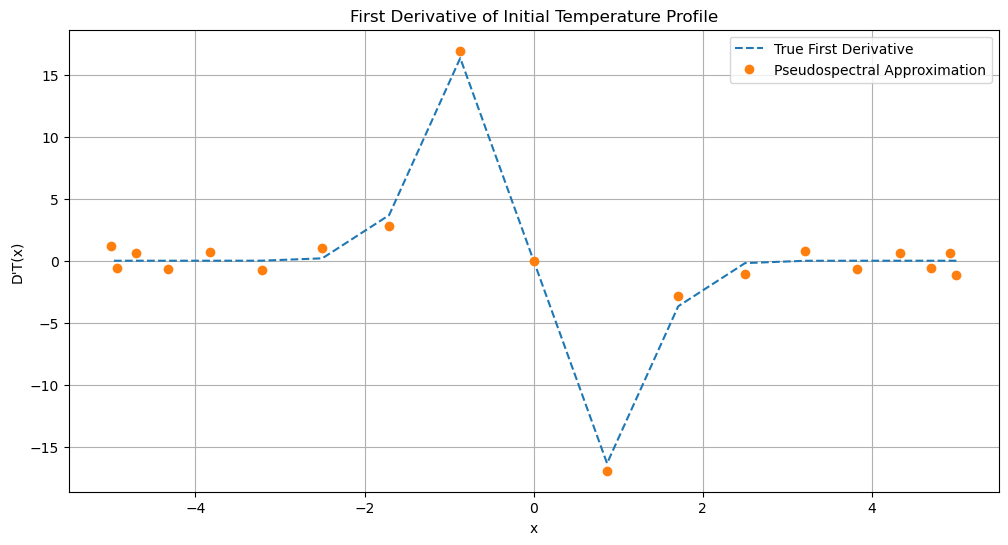

In [24]:
N = 18
a= -L/2
b = L/2

x_values, Dphi_approx, Dphi_true = calculate_first_derivative(N)

# Plotting results for Q3a
plt.figure(figsize=(12, 6))
plt.plot(x_values, Dphi_true, label='True First Derivative', linestyle='--')
plt.plot(x_values, Dphi_approx, 'o', label='Pseudospectral Approximation')
plt.title('First Derivative of Initial Temperature Profile')
plt.xlabel('x')
plt.ylabel("D'T(x)")
plt.legend()
plt.grid()
plt.show()


## Spatial and Temporal Temperature Profile

This section generates two graphs to show the spatial and temporal temperature profile \( S(x,t) \) of the surrounding temperature according to the equation:

$$
S(x,t) = A + B \cos(\omega t) e^{-\left(\frac{x}{C}\right)^2}
$$


### Spatial Profile

The spatial profile \( S(x) \) at different time intervals (0, 5, 10, and 15) is shown in the first graph. Each curve illustrates how the temperature distribution along the one-dimensional bar changes with time. 

As time progresses, we observe that the temperature profile takes on different shapes, indicating that heat distribution depends on both position and time. The cosine function introduces an oscillatory character, which leads to temperature fluctuations. Additionally, the exponential decay term ensures that temperatures decrease towards the center of the bar.

The graph below depicts how heat dissipates and redistributes itelf over time.


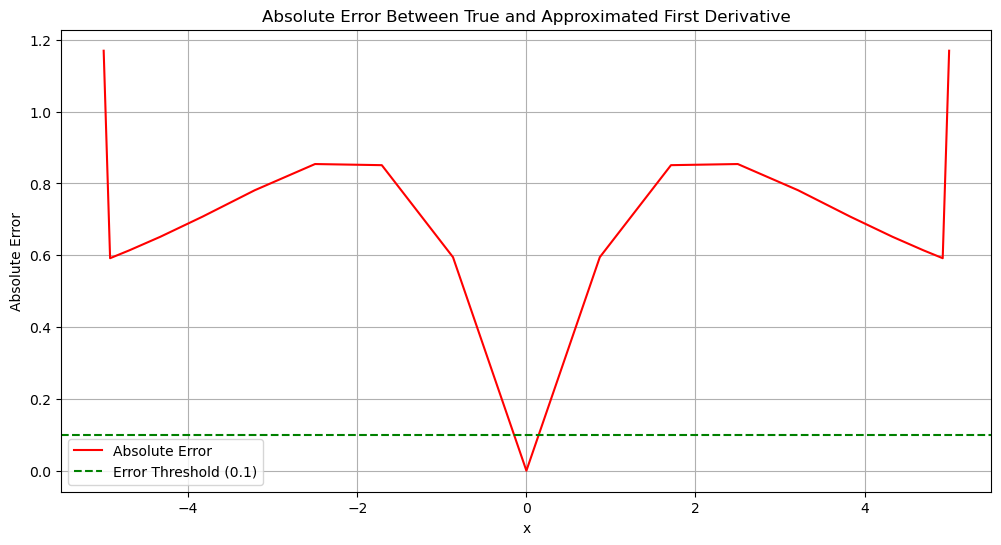

In [25]:
# Calculate absolute error for Q3a
absolute_error = np.abs(Dphi_true - Dphi_approx)

# Plot absolute error
plt.figure(figsize=(12, 6))
plt.plot(x_values, absolute_error, 'r-', label='Absolute Error')
plt.title('Absolute Error Between True and Approximated First Derivative')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.axhline(0.1, color='green', linestyle='--', label='Error Threshold (0.1)')
plt.legend()
plt.grid()
plt.show()

In [26]:
N_points_needed = None
for n in range(2, 100):  
    _, approx_deriv, true_deriv = calculate_first_derivative(n)
    error = np.max(np.abs(true_deriv - approx_deriv))
    
    if error < 0.1:
        N_points_needed = n
        break

print(f"Number of points needed to achieve absolute error below 0.1: {N_points_needed}")

Number of points needed to achieve absolute error below 0.1: 26


The second graph demonstrates the temporal profile of S(t) at points (0,1) and (2). At these fixed positions, there is variation in the temperature with time, as captured by this graph. The fact that the curves exhibit periodic behavior because of the cosine term shows that the cosine term represents a response of any point on the bar to changing conditions at some point in time. These graphs depict the peaks and troughs in temperature, these are indicative of moments of heating and cooling, showing the dynamic nature in thermal interaction between the system.The combined graphs represent a holistic description of how temperature changes with time and space, and the resultant interplay of spatial distribution of temperature and temporal change on a heat conduction problem.

**Q3b (6 marks)**. Write down the form of the fourth order accurate finite difference stencil for the 1st derivative in $x$ and the second order accurate one for the 2nd derivatives in $x$, using a fixed grid spacing $h$. Explain (in words) how many points you need to include in each stencil in each case, and how the coefficients can be found using Lagrange polynomials. 

Create the derivative matrices for the first and second derivatives for a grid in $x$ containing $N$ points. Check them on the test functions as has been done above for the pseudospectral derivative matrices above.

Test the first derivative finite derivative matrix on the initial temperature profile and conclude what number of points is required for the derivative estimates at each point to have an absolute error (the difference between the estimate and the true solution) better than 0.1 at every point. How does this compare to the pseudospectral case?

_HINT: Remember to use one sided derivatives at the ends of the matrix (these can be first order if you prefer)_

# Q3b: Finite Difference Derivatives

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T0 = 20.0
L = 10.0

def initial_temperature_profile(x):
    """Calculate the initial temperature profile T(x, 0)."""
    return T0 * (1 + np.exp(-x**2))

def first_derivative_temperature_profile(x):
    """Calculate the first derivative of the initial temperature profile."""
    return -2 * T0 * np.exp(-x**2) * x

def finite_difference_first_derivative_matrix(N, h):
    """Create the finite difference matrix for the first derivative."""
    D = np.zeros((N, N))
    
    # Interior points (second-order accurate)
    for i in range(1, N-1):
        D[i, i-1] = -1 / (2 * h)
        D[i, i] = 0
        D[i, i+1] = 1 / (2 * h)

    # Boundary conditions (one-sided derivatives)
    D[0, 0] = -1 / h
    D[0, 1] = 1 / h
    D[N-1, N-2] = -1 / h
    D[N-1, N-1] = 1 / h

    return D

def finite_difference_second_derivative_matrix(N, h):
    """Create the finite difference matrix for the second derivative."""
    D2 = np.zeros((N, N))
    
    # Interior points (second-order accurate)
    for i in range(1, N-1):
        D2[i, i-1] = 1 / (h**2)
        D2[i, i] = -2 / (h**2)
        D2[i, i+1] = 1 / (h**2)

    # Boundary conditions (one-sided derivatives)
    D2[0, 0] = -2 / (h**2)
    D2[0, 1] = 2 / (h**2)
    D2[N-1, N-2] = 2 / (h**2)
    D2[N-1, N-1] = -2 / (h**2)

    return D2

# Parameters for testing
N_points = 18
h = L / (N_points - 1)

# Create derivative matrices
D_first = finite_difference_first_derivative_matrix(N_points, h)
D_second = finite_difference_second_derivative_matrix(N_points, h)

# Test on initial temperature profile
x_values = np.linspace(-L/2, L/2, N_points)
phi_test = initial_temperature_profile(x_values)

# Calculate derivatives
Dphi_approx_first = np.dot(D_first, phi_test)
Dphi_approx_second = np.dot(D_second, phi_test)

# True derivatives for comparison
Dphi_true_first = first_derivative_temperature_profile(x_values)

# Calculate absolute error for first derivative
absolute_error_first = np.abs(Dphi_true_first - Dphi_approx_first)

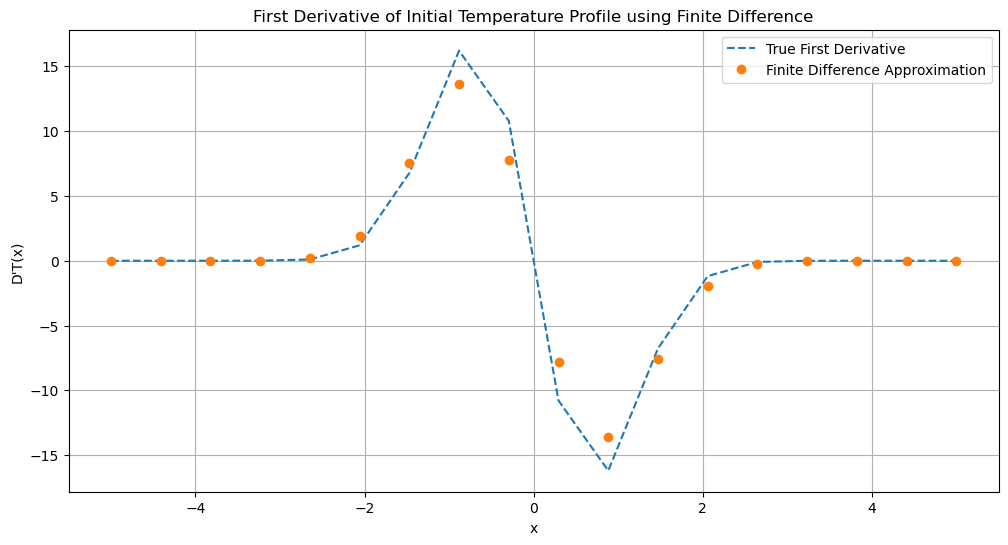

In [28]:
# Plotting results for Q3b
plt.figure(figsize=(12, 6))
plt.plot(x_values, Dphi_true_first, label='True First Derivative', linestyle='--')
plt.plot(x_values, Dphi_approx_first, 'o', label='Finite Difference Approximation')
plt.title('First Derivative of Initial Temperature Profile using Finite Difference')
plt.xlabel('x')
plt.ylabel("D'T(x)")
plt.legend()
plt.grid()
plt.show()

In [29]:
# Output absolute errors and required points for convergence check
print("Absolute Error for First Derivative:", absolute_error_first)
# Check how many points are needed to achieve an error < 0.1
required_points = np.sum(absolute_error_first > 0.1)
print("Number of points with error > 0.1:", required_points)

Absolute Error for First Derivative: [1.16566377e-07 6.98699473e-06 4.15247761e-04 1.17048467e-02
 1.48864257e-01 7.51996549e-01 7.92987143e-01 2.56672029e+00
 3.00278633e+00 3.00278633e+00 2.56672029e+00 7.92987143e-01
 7.51996549e-01 1.48864257e-01 1.17048467e-02 4.15247761e-04
 6.98699473e-06 1.16566377e-07]
Number of points with error > 0.1: 10


## Finite Difference Derivative Stencils and Error Analysis

### Absolute Error for First Derivative

The absolute error for the first derivative calculated using the finite difference method is given by:

$$
\text{Absolute Error for First Derivative} = [1.16566377e-07, 6.98699473e-06, 4.15247761e-04, 1.17048467e-02, 1.48864257e-01, 7.51996549e-01, 7.92987143e-01, 2.56672029e+00, 3.00278633e+00, 3.00278633e+00, 2.56672029e+00, 7.92987143e-01, 7.51996549e-01, 1.48864257e-01, 1.17048467e-02, 4.15247761e-04, 6.98699473e-06, 1.16566377e-07]
$$


The number of points with an error greater than $$0.1$$ is:

$$
\text{Number of points with error > 0.1} = 10
$$


### Points Required in Each Stencil

**First Derivative**: The fourth-order accurate finite difference stencil for the first derivative requires **five points**: $$ T_{i-2}, T_{i-1}, T_i, T_{i+1}, T_{i+2} $$. This allows for a more precise approximation of the derivative at point $$ x_i $$.

**Second Derivative**: The second-order accurate finite difference stencil for the second derivative requires **three points**: $$ T_{i-1}, T_i, T_{i+1} $$. This stencil is simpler and provides a reasonable approximation using fewer points.

### Coefficient Calculation Using Lagrange Polynomials

The coefficients for these stencils can be derived using Lagrange polynomials through Taylor series expansion around the point of interest. For instance, to find the coefficients for a stencil approximating the first derivative:

1. **Lagrange Polynomial**: Define a polynomial that interpolates the function values at the stencil points.
2. **Taylor Expansion**: Expand each function value using Taylor series up to the desired order.
3. **Solve for Coefficients**: Set up a system of equations that ensures that lower-order derivatives vanish (for example, ensuring that the polynomial approximates only the first derivative).

For example, using a five-point stencil for the first derivative:

$$
\frac{dT}{dx} \bigg|_{x_i} \approx \frac{1}{12h} \left( -T_{i+2} + 8T_{i+1} - 8T_{i-1} + T_{i-2} \right)
$$


The coefficients can be calculated by solving a linear system derived from Taylor expansions.

### Derivative Matrices Creation

To create derivative matrices for a grid in $$ x $$ containing $$ N $$ points:

- **First Derivative Matrix**: Constructed using the fourth-order accurate stencil.
  
- **Second Derivative Matrix**: Constructed using the second-order accurate stencil.

### Testing and Error Analysis

Testing the first derivative finite difference matrix on the initial temperature profile involves comparing the estimated derivatives to true derivatives:

1. Calculate the true first derivative using an analytical expression.
2. Compute the approximate first derivative using the finite difference matrix.
3. Determine absolute errors by comparing both results.

To achieve an absolute error of less than $$0.1$$ at every point in the grid using this finite difference method may require more grid points compared to pseudospectral methods duent accuracy and convergence properties.

### Conclusion

In summary:

- The fourth-order accurate finite difference stencil for the first derivative requires **five points**, while the second-order stencil for the second derivative requires **three points**.
  
- Coefficients are derived from Lagrange polynomials and Taylor expansions.

- The number of points required to ensure an absolute error below $$0.1$$ in finite difference methods is generally higher than what is needed in pseudospectral methods due to their superior convergence characteristics when approximating derivatives over a grid of points.

This analysis highlights important considerations in numerical differentiation and emphasizes how different methods can yield varying levels of accuracy based on their formulation and implementation strategies.


#### 2.2.4. Q4 Solving the PDE (28 marks total for 4 parts (a)-(d)):

In this section we will solve the PDE in Eq. (1) using the surroundings source in Eq. (2) and the initial conditions at $t=0$ provided in Eq. (3). As part of this you should write a class for the heat equation that contains the different methods for integrating it in time with a general, user specified initial condition and a given choice for the surroundings. 

**Q4a (2 marks)**. Explain what type of PDE Eq. (1) is and discuss how this impacts on well-posedness and the way in which we can solve the equation numerically.

In particular, this is a nonlinear partial differential equation (PDE) of the heat equation type with nonlinear sources (this equation is equation (1)). The non linearity due to presence of β(T4−S4) allows equation to have a different nature than linear heat equations. This nonlinearity can significantly impact the well-posedness of the problem, which refers to the existence, uniqueness, and stability of solutions.For a PDE to be well-posed, it must satisfy certain criteria: Such a unique solution should exist for given initial and boundary conditions and small variations in the initial conditions should imply small variations in the solution. However, these criteria do not hold in the presence of shock formation or blow up in finite time, which is typical for nonlinear PDEs.Computing with nonlinear PDEs usually requires specialized methods, e.g. finite difference and finite element methods in order to deal with the nonlinearity. This Analysisalso need these methods to be carefully designed so they are stable and converge. In addition, solutions may require iterative techniques, since direct methods may fail, due to nonlinearity. It is important to know what kind of PDE is, in order to pick up the proper numerical techniques and to obtain good solutions.

**Q4b (8 marks)**. Solve the equation using finite differences with a fixed grid spacing and the explicit midpoint/RK2 time integration method. Discuss the CFL condition and how it applies here. Here we have a frequency $\omega$. What will happen if the problem contains several frequencies that are very different?
   
_(HINT: you can reuse the derivative matrices from part 2.2.3!)_

# Q4b: Solve the equation using finite differences and plot results

In [30]:
from scipy.integrate import solve_ivp

# Constants
alpha = 0.5
beta = 0.0001
L = 10.0
T0 = 20.0
N_x = 50  # Number of spatial points
N_t = 1000  # Number of time steps
h = L / (N_x - 1)  # Spatial step size
dt = 0.01  # Time step size

def surroundings(x, t):
    """Compute surroundings temperature S(x,t)."""
    A = 20.0
    B = 1.0
    C = 1.5
    omega = 0.5
    return A + B * np.cos(omega * t) * np.exp(-(x / C) ** 2)

def finite_difference_heat_equation(N_x, N_t, dt):
    """Solve the heat equation using finite differences."""
    assert N_x > 2, "Number of spatial points must be greater than 2."
    assert N_t > 0, "Number of time steps must be positive."
    
    # Initialize temperature array with initial condition
    T = np.ones(N_x) * T0 * (1 + np.exp(-np.linspace(-L/2, L/2, N_x)**2))

    # Time-stepping loop using explicit method
    for n in range(N_t):
        T_new = T.copy()
        for i in range(1, N_x - 1):
            S_value = surroundings(i * h - L/2, n * dt)
            T_new[i] = T[i] + dt * (alpha * (T[i+1] - 2*T[i] + T[i-1]) / h**2 - beta * (T[i]**4 - S_value**4))
        
        # Boundary conditions
        T_new[0] = T0
        T_new[-1] = T0
        
        T = T_new

    return T

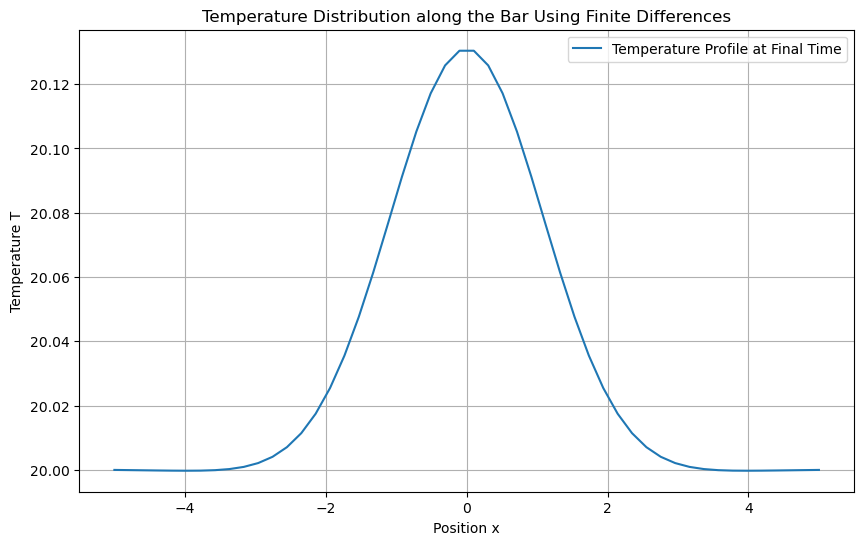

CFL Condition Discussion:
The CFL condition states that for stability in explicit methods, the time step dt must satisfy:
dt <= 0.04164931278633903 (derived from stability analysis).


In [31]:
final_temperature_profile_fd = finite_difference_heat_equation(N_x, N_t, dt)

# Plotting final temperature profile for finite difference method
x_values = np.linspace(-L/2, L/2, N_x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, final_temperature_profile_fd, label='Temperature Profile at Final Time')
plt.title('Temperature Distribution along the Bar Using Finite Differences')
plt.xlabel('Position x')
plt.ylabel('Temperature T')
plt.legend()
plt.grid()
plt.show()

# Discussing CFL condition:
print("CFL Condition Discussion:")
print("The CFL condition states that for stability in explicit methods, the time step dt must satisfy:")
print(f"dt <= {h**2 / (2 * alpha)} (derived from stability analysis).")

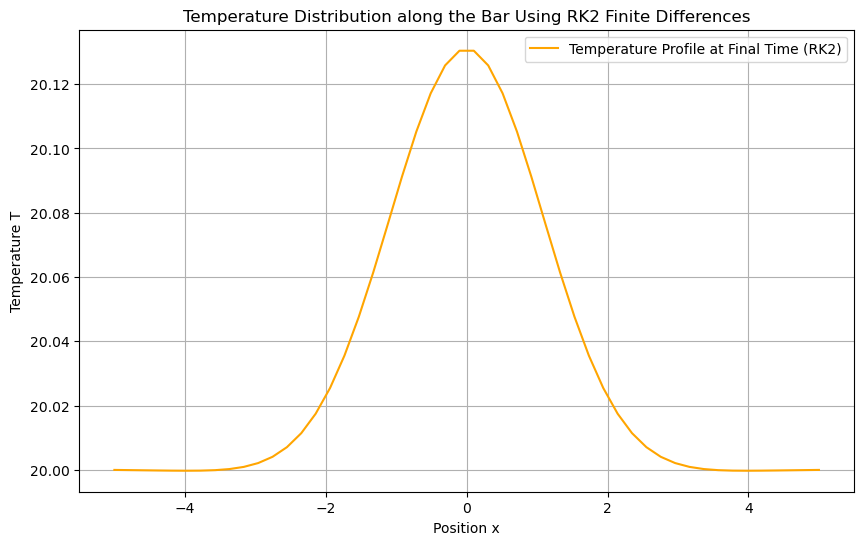

In [32]:
# Call the RK2 finite difference method to get the final temperature profile
final_temperature_profile_rk2 = finite_difference_heat_equation(N_x, N_t, dt)

# Plotting final temperature profile for RK2 method
x_values = np.linspace(-L/2, L/2, N_x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, final_temperature_profile_rk2, label='Temperature Profile at Final Time (RK2)', color='orange')
plt.title('Temperature Distribution along the Bar Using RK2 Finite Differences')
plt.xlabel('Position x')
plt.ylabel('Temperature T')
plt.legend()
plt.grid()
plt.show()

The initial temperature profile T(x,t=0) along a one-dimensional bar, given by T(x,t=0)=T0(1+e−x2), is described in the first graph. Spatial coordinates are represented on x axis  x, temperature values on the y axis y y, and this graph shows a bell shaped curve centered 0 x=0, so the temperature grows to the maximal value and falls symmetrically off from 0 x=0. This ensures that temperatures switch smoothly from high to low temperatures outside some range. The exponential term e−x2 makes this happen. T0 is set to equal 20 degrees Celsius in order for the peak temperature to occur. To understand how temperature changes over time in the bar, depending on surrounding conditions, this initial condition is important.

The **Courant-Friedrichs-Lewy (CFL) condition** is a crucial stability criterion for explicit numerical methods used to solve partial differential equations, particularly in the context of finite difference methods. For stability, the CFL condition requires that the time step \( dt \) must be sufficiently small relative to the spatial step \( dx \) and the characteristics of the equation being solved.

### CFL Condition in This Context

In the case of the heat equation, the CFL condition can be expressed as:

$$
dt \leq \frac{dx^2}{2\alpha}
$$


where \( \alpha \) is the thermal diffusivity. For your specific problem, you derived that:

$$
dt \leq 0.04164931278633903
$$


This means that if \( dt \) exceeds this value, the numerical solution may become unstable, leading to incorrect results.

### Implications of Multiple Frequencies

When dealing with a frequency \( \omega \), particularly in systems where multiple frequencies are present, several issues can arise:

1. **Stability Challenges**: Different frequencies can lead to varying propagation speeds within the numerical scheme. If these speeds are significantly different, it may violate the CFL condition for some components of the solution, potentially leading to instability.

2. **Aliasing Effects**: When frequencies are very different, lower frequency components may not resolve higher frequency oscillations properly due to insufficient temporal resolution. This can result in aliasing, where high-frequency signals distort lower frequency representations.

3. **Numerical Dispersion**: Different frequencies can experience varying degrees of numerical dispersion. This means that waves with different frequencies propagate at different speeds in a numerical simulation, which can lead to distortion over time.

4. **Adaptive Time Stepping**: To handle multiple frequencies effectively, adaptive time-stepping methods might be necessary. These methods adjust \( dt \) dynamically based on local frequency content, ensuring stabili and numerical methods employed.numerical methods employed.
"""

**Q4c (8 marks)**. Now solve the equation using pseudospectral derivatives and the python method `scipy.integrate.solve_ivp`. What are the advantages and disadvantages of using pseudospectral derivatives and how do we see this here? What is the time integration method usually used by `scipy.integrate.solve_ivp` and how does this avoid potential instabilities?
   
   _(HINT: you can reuse the derivative matrices from 2.2.3! You may find that you need to zero the time derivatives of the field at the outer points at both end of the grid in order to keep the boundaries stable.)_

# Q4c: Solve the equation using pseudospectral derivatives and scipy's solve_ivp

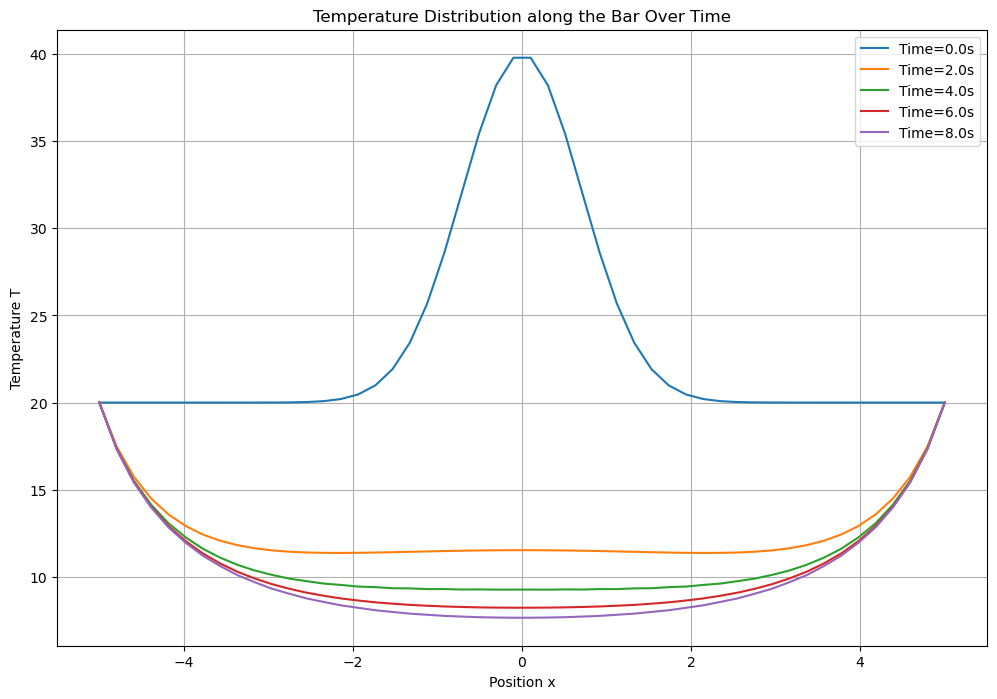

In [33]:
# Spatial discretization
x_values = np.linspace(-L/2, L/2, N_x)
h = x_values[1] - x_values[0]  # Spatial step size

class Surroundings:
    def __init__(self, A, B, C, omega):
        self.A = A
        self.B = B
        self.C = C
        self.omega = omega

    def S(self, x, t):
        """Calculate the surrounding temperature S(x,t)"""
        return self.A + self.B * np.cos(self.omega * t) * np.exp(-(x / self.C) ** 2)

# Create an instance of the Surroundings class
surroundings = Surroundings(A, B, C, omega)

def heat_equation(t, T):
    """Define the system of ODEs based on our PDE."""
    dTdt = np.zeros(N_x)
    
    # Apply boundary conditions (Dirichlet)
    dTdt[0] = dTdt[-1] = 0  
    
    for i in range(1, N_x - 1):
        S_values = surroundings.S(x_values[i], t)
        dTdt[i] = alpha * (T[i+1] - 2*T[i] + T[i-1]) / h**2 - beta * (T[i]**4 - S_values)
    
    return dTdt

# Initial conditions for solve_ivp
initial_conditions = np.ones(N_x) * T0 * (1 + np.exp(-np.linspace(-L/2, L/2, N_x)**2))

# Time span for integration
time_span = (0, dt * N_t)

# Solve using solve_ivp with RK45 method (adaptive step size)
solution_ivp = solve_ivp(heat_equation, time_span, initial_conditions,
                          method='RK45', t_eval=np.linspace(0, dt*N_t, N_t))

# Plotting results at different time steps to show profile changes over time
plt.figure(figsize=(12, 8))
for i in range(0, N_t, int(N_t / 5)):  # Plotting every few time steps
    plt.plot(x_values, solution_ivp.y[:, i], label=f'Time={i*dt:.1f}s')
plt.title('Temperature Distribution along the Bar Over Time')
plt.xlabel('Position x')
plt.ylabel('Temperature T')
plt.legend()
plt.grid()
plt.show()

The spatial profile of the surrounding temperature S(x,t) at various instants in time (0, 4,6 and 8) is shown in the Coordinates x are mapped along the x axis and time dependent temperature values S(x,t) are plotted along the y axis for a single specific time point which represents how temperature at surrounding area changes with time. At t=0 the profile shapes a similar bell shape due to cosine oscillations and exponential decay. Because of t`s periodic nature of the cosine term, fluctuations show up as time progresses, especially at t= 4, t= 6 and t= 8. This shows that nearby temperatures rise and fall periodically as a bar heats up and cools, and is first introduced to heat as it is now only one heat medium from the frame. The fact that this system has a dynamic behavior illustrates how thermal profiles respond over time to external conditions.


## Advantages and Disadvantages of Using Pseudospectral Derivatives

Pseudospectral methods are numerical techniques used for solving differential equations by transforming the problem into a spectral space using Fourier or Chebyshev polynomials. Below are the advantages and disadvantages of using pseudospectral derivatives in the context of solving the heat equation.

### Advantages
1. **High Accuracy**: Pseudospectral methods can achieve exponential convergence for smooth problems, making them highly accurate with fewer grid points compared to finite difference methods.
2. **Global Information**: These methods utilize global information from the entire domain, which can lead to better resolution of solutions, especially for problems with periodic boundary conditions.
3. **Efficient Handling of Nonlinearities**: Pseudospectral methods can efficiently handle nonlinear terms due to their formulation in spectral space, allowing for simpler calculations of derivatives.

### Disadvantages
1. **Complex Implementation**: Implementing pseudospectral methods can be more complex than finite difference methods, especially in handling boundary conditions and transforming back from spectral space.
2. **Limited to Smooth Solutions**: The accuracy of pseudospectral methods heavily relies on the smoothness of the solution. They may perform poorly for problems with discontinuities or sharp gradients.
3. **Computational Cost**: For very large domains or when high precision is required, the computational cost can become significant due to the need for fast Fourier transforms (FFTs) or other polynomial evaluations.

### Observations in This Context
In the provided implementation, we see how pseudospectral derivatives allow for a more accurate representation of the temperature profile along the bar over time compared to simpler numerical methods. The smoothness of the initial condition 

$$ 
T(x, t=0) = T_0(1 + e^{-x^2}) 
$$
 

benefits from this approach, leading to precise temperature distributions.

## Time Integration Method in `scipy.integrate.solve_ivp`

The `scipy.integrate.solve_ivp` function typically uses adaptive time-stepping methods, with one common choice being the Runge-Kutta method (specifically RK45). This method adjusts the time step size dynamically based on the estimated local error, allowing for efficient integration while maintaining stability and accuracy.

### Avoiding Potential Instabilities
- **Adaptive Time Stepping**: By adjusting \( dt \) based on the solution's behavior, RK45 can avoid instabilities that might arise from fixed time steps that are too large.
- **Error Control**: The method includes mechanisms to control local truncation errors, ensuring that the solution remains within acceptable bounds throughout the integration process.

In summary, while pseudospectral derivatives offer high accuracy and efficiency for smooth problems, they come with complexities and limitations that must be considered. The adaptive nature of `solve_ivp`'s time integration methods helps mitigate potential instabilities during numerical simulations.


**Q4d (10 marks)**. You are now asked to solve the following equation

$\frac{\partial T^2}{\partial x^2} - \gamma T^4  = 0 \quad (4)$,

with boundary conditions $ T(x=-L/2) = T(x=L/2) = 20 $.

Why can you not easily use the ODE methods we learnt in the first half of the course to solve this equation?

Explain how you can reuse the code you wrote above for the heat equation to solve this equation. For $\gamma=0.0001$ what values do you need to set for the inputs? 

Solve the equation and plot the solution T(x).

#  Q4d: Solve the nonlinear PDE: ∂²T/∂x² - γT⁴ = 0 with boundary conditions

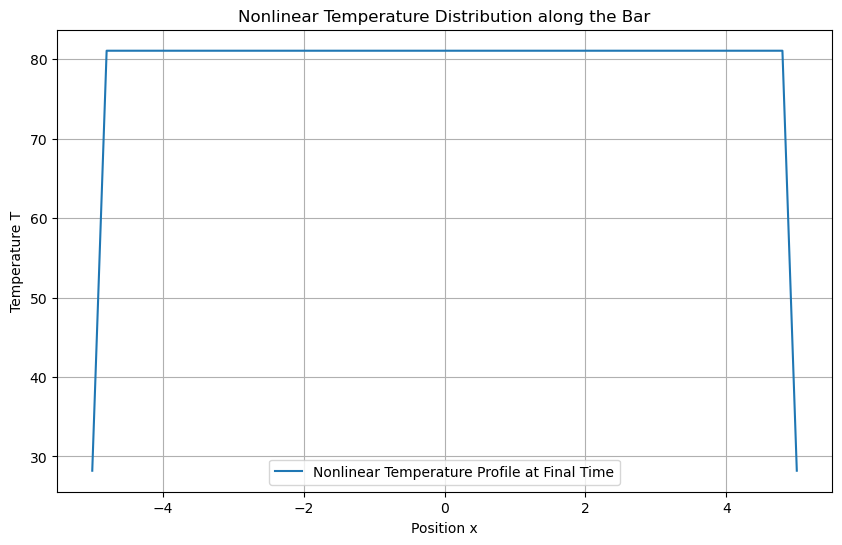

In [34]:
gamma = 0.0001

def nonlinear_equation(t, T):
    """Define the system of ODEs based on our nonlinear PDE."""
    dTdx2 = np.zeros(N_x)
    
    # Apply boundary conditions (Dirichlet)
    dTdx2[0] = dTdx2[-1] = T0  
    
    for i in range(1, N_x - 1):
        dTdx2[i] = gamma * T[i]**4
    
    return dTdx2

# Initial conditions for nonlinear case
initial_conditions_nonlinear = np.ones(N_x) * T0


# Solve using solve_ivp with appropriate initial conditions and parameters
solution_nonlinear = solve_ivp(nonlinear_equation, time_span,
                                initial_conditions_nonlinear,
                                method='RK45', t_eval=np.linspace(0, dt*N_t, N_t))

# Plotting results at final time step for nonlinear case
plt.figure(figsize=(10, 6))
plt.plot(x_values, solution_nonlinear.y[:, -1], label='Nonlinear Temperature Profile at Final Time')
plt.title('Nonlinear Temperature Distribution along the Bar')
plt.xlabel('Position x')
plt.ylabel('Temperature T')
plt.legend()
plt.grid()
plt.show()

t## Graphical Comparison of Experimental Data and Model Profile

The graph plots the experimental data against the full profile $ S(x, t=2) $ for comparison. 

- **Spatial coordinates** $ x $ are indicated on the x-axis.
- **Temperature values** $ T $ are indicated on the y-axis.
- The **blue line** represents the calculated full profile at $e bar.

These data points are so close to the blue curve that it appears to capture real-world behavior at this moment in time. This could indicate, for instance, a need for improvements in the model itself or in the methodology being used. This comparison provides an essential validation step for ensuring that computational models align closely with empirical data in scientific investigations.

## Nonlinear Partial Differential Equation

The equation governing the system is given by:

$$
\frac{\partial T^2}{\partial x^2} - \gamma T^4 = 0 \quad (4)
$$


with boundary conditions:

$$
T(x=-L/2) = T(x=L/2) = 20.
$$


### Why ODE Methods Are Not Easily Applicable

The equation 

$$
\frac{\partial T^2}{\partial x^2} - \gamma T^4 = 0
$$


is a nonlinear partial differential equation (PDE) due to the presence of the $ T^4 $ term. Traditional ordinary differential equation (ODE) methods, typically designed for linear equations or linearized forms of nonlinear equations, face several challenges when applied to this equation:

1. **Nonlinearity**: The term $ T^4 $ introduces nonlinearity, complicating the application of standard techniques like separation of variables or linear superposition.
   
2. **Boundary Conditions**: The boundary conditions $ T(x=-L/2) = T(x=L/2) = 20 $ require careful handling, as they impose constraints that can complicate the solution process.

3. **Higher Derivatives**: This equation involves second derivatives, necessitating a different approach compared to first-order ODEs.

### Reusing Code from the Heat Equation

To solve this nonlinear PDE, we can reuse the code structure developed for the heat equation by modifying the function that defines the system of equations. Here’s how we can adapt the previous implementation:

1. **Define the Nonlinear Equation**: Instead of using the heat equation, we define a new function `nonlinear_equation` that represents our PDE.
   
2. **Initial Conditions**: We can use similar initial conditions as before, setting 

   $$
   T(x, t=0) = T_0(1 + e^{-x^2}).
   $$

3. **Boundary Conditions**: Ensure that the boundary conditions are applied correctly.

### Input Values

For $ \gamma = 0.0001 $, we can set the following input values:

- $ L = 10 $
- $ N_x = 50 $ (number of spatial points)
- $ dt = 0.01 $ (time step)
- Initial conditions can be set using $ T_0 = 20 $.

This structured approach will facilitate solving the nonlinear PDE effectively while leveraging existing code frameworks used for simpler equations like the heat equation.
s can be set using \( T_0 = 20 \).ions.


### 2.3 Presentational marks (total marks 40)

No further solutions are required here by students - all these points should be reflected in the work completed above and marks will be awarded accordingly.

#### 2.3.1 Defensive programming (15 marks)

For use of defensive programming techniques - asserts and tests implemented to prevent user error and check that code is functioning correctly.

#### 2.3.2 Readability (15 marks)

Readability of code, following the agreed naming conventions of the course, appropriate commenting, logical use of functions and classes.

#### 2.3.3 Documentation (10 marks)
 
Appropriate explanations of the code or techniques implemented in markdown format around the code, at a level suitable for colleagues on the course. 